In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


DATASET Loading

In [2]:
df = pd.read_csv(r'D:\Satascience\archive (1)\loan_data.csv')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [25]:
print(df.head(5))

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [5]:
print("\nData info:")
print(df.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaul

In [6]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [7]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000 

1. Preprocessing - Outlier Handling

In [8]:
# Filter out unrealistic ages and employment experience
df = df[df['person_age'] <= 100]
df = df[df['person_emp_exp'] < df['person_age']]

2. Exploratory Data Analysis (EDA)

In [9]:
# 2. Exploratory Data Analysis (EDA)
# Set plot style
sns.set(style="whitegrid")

Univariate Analysis

Text(0.5, 1.0, 'Distribution of Loan Status')

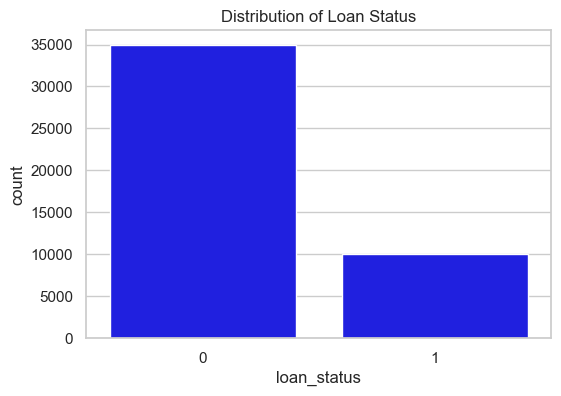

In [10]:
# Plot 1: Distribution of Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df , color='blue')
plt.title('Distribution of Loan Status')

Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

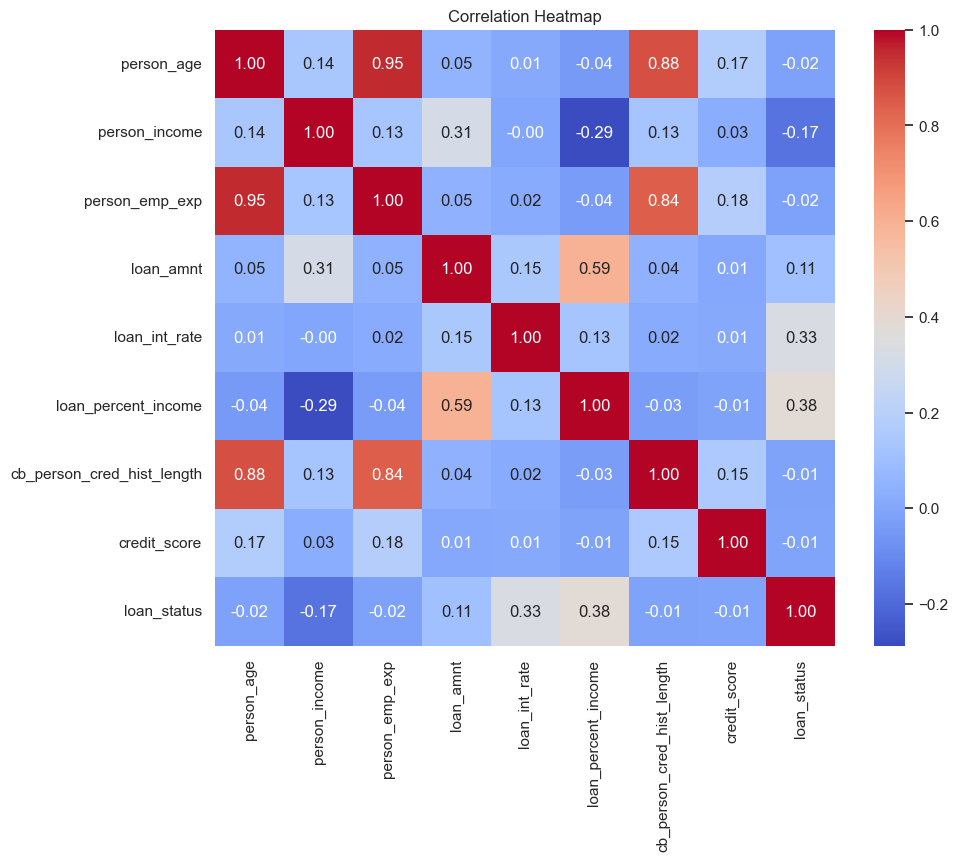

In [11]:
# Plot 2: Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

Bivariate Analysis

Text(0.5, 1.0, 'Loan Amount by Loan Status')

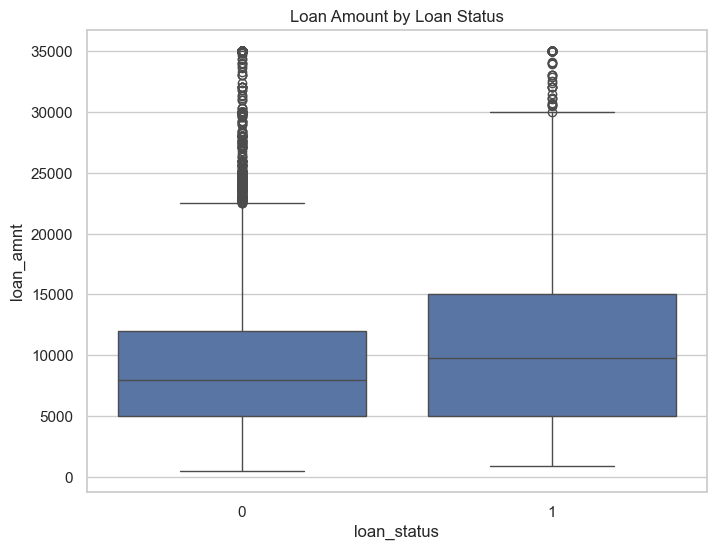

In [12]:

# Plot 3: Loan Amount vs Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount by Loan Status')

In [13]:
# Summary statistics after cleaning
print(f"Data shape after outlier removal: {df.shape}")
print(df.describe())

Data shape after outlier removal: (44993, 14)
         person_age  person_income  person_emp_exp     loan_amnt  \
count  44993.000000   4.499300e+04    44993.000000  44993.000000   
mean      27.748428   7.990845e+04        5.394528   9583.176761   
std        5.909737   6.332213e+04        5.927159   6314.802655   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.719500e+04        1.000000   5000.000000   
50%       26.000000   6.704600e+04        4.000000   8000.000000   
75%       30.000000   9.577800e+04        8.000000  12237.000000   
max       94.000000   2.448661e+06       76.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   44993.000000         44993.000000                44993.000000   
mean       11.006448             0.139736                    5.866557   
std         2.978985             0.087207                    3.877167   
min         5.420000             0.000000        

In [27]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [29]:
# 3. Categorical Encoding
# Use Label Encoding for binary or ordinal, and Get Dummies for others
# For simplicity, we can use pd.get_dummies for all categorical columns
df_encoded = pd.get_dummies(df, columns=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'], drop_first=True)

In [15]:
# 4. Split data
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# 5. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [17]:
# 6. Model Training and Comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(dual=False), # Use dual=False for n_samples > n_features
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    if name in ["Logistic Regression", "Linear SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.8948
Linear SVM Accuracy: 0.8947
Decision Tree Accuracy: 0.8942
Random Forest Accuracy: 0.9287


c:\Users\khpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:39:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9354


In [18]:
# Display results
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\nModel Comparison Results:")
print(results_df)


Model Comparison Results:
                 Model  Accuracy
4              XGBoost  0.935437
3        Random Forest  0.928659
0  Logistic Regression  0.894766
1           Linear SVM  0.894655
2        Decision Tree  0.894210


In [19]:
# 6. Model Training and Comparison (Retrying without XGBoost)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(dual=False),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
best_model_name = ""
best_acc = 0
best_model_obj = None

for name, model in models.items():
    if name in ["Logistic Regression", "Linear SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_acc:
        best_acc = acc
        best_model_name = name
        best_model_obj = model

Logistic Regression Accuracy: 0.8948
Linear SVM Accuracy: 0.8947
Decision Tree Accuracy: 0.8964
Random Forest Accuracy: 0.9283
Gradient Boosting Accuracy: 0.9234


In [20]:
# Evaluation of the best model (using test set)
if best_model_name in ["Logistic Regression", "Linear SVM"]:
    y_pred_best = best_model_obj.predict(X_test_scaled)
else:
    y_pred_best = best_model_obj.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print(f"\nBest Model: {best_model_name}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Best Model: Random Forest

Confusion Matrix:
[[6821  178]
 [ 467 1533]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6999
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      8999
   macro avg       0.92      0.87      0.89      8999
weighted avg       0.93      0.93      0.93      8999



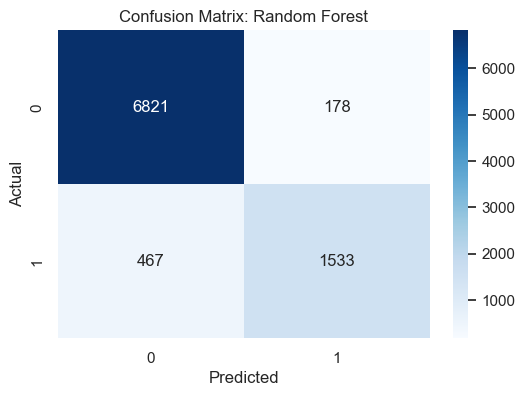

In [21]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('best_model_confusion_matrix.png')

In [22]:
# 7. Hyperparameter Tuning (Fine-tuning the best model)
# Let's assume Random Forest or Gradient Boosting is the best.
# I will do a small GridSearch for the best model to demonstrate fine-tuning.

param_grid = {}
if "Random Forest" in best_model_name:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    }
elif "Gradient Boosting" in best_model_name:
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.05]
    }

In [23]:
# Conducting GridSearchCV
if param_grid:
    grid_search = GridSearchCV(best_model_obj, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"\nBest parameters for {best_model_name}:")
    print(grid_search.best_params_)
    print(f"Fine-tuned Accuracy: {grid_search.best_score_:.4f}")


Best parameters for Random Forest:
{'max_depth': None, 'n_estimators': 200}
Fine-tuned Accuracy: 0.9272
